In [1]:
# import packages
import sys
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, Image

print 'OpenCV version = ' + cv2.__version__

OpenCV version = 3.4.0


In [2]:
# function for image thresholding
def imThreshold(img, threshold, maxVal):
    assert len(img.shape) == 2 # input image has to be gray
    
    height, width = img.shape
    bi_img = np.zeros((height, width), dtype=np.uint8)
    for x in xrange(height):
        for y in xrange(width):
            if img.item(x, y) > threshold:
                bi_img.itemset((x, y), maxVal)

    return bi_img
            

In [3]:
img = cv2.imread('snow.jpg')

print type(img)
print img.shape
print list(xrange(10))

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

print img_gray.shape

print img_gray.item(0,0)

<type 'numpy.ndarray'>
(338, 500, 3)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
(338, 500)
5


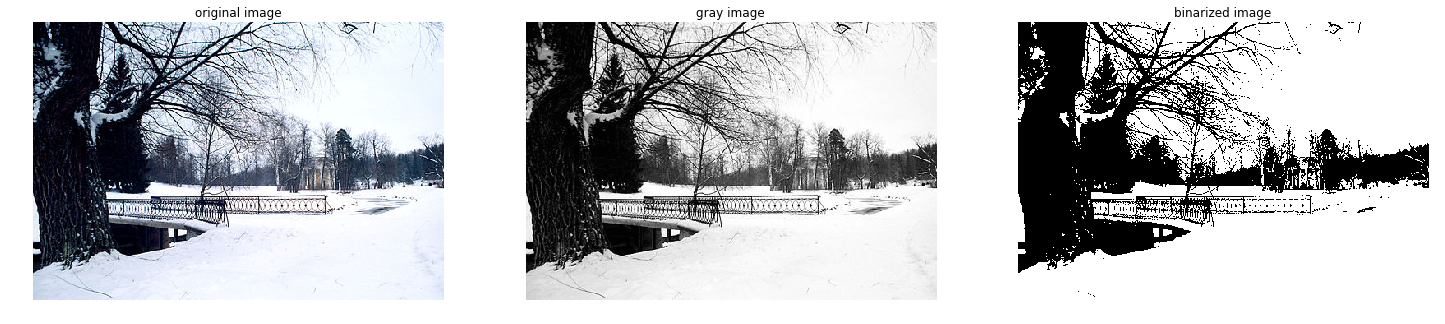

In [4]:
# read the image for local directory (same with this .ipynb) 
img = cv2.imread('snow.jpg')

# convert a color image to gray
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# image thresholding using global tresholder
img_bi = imThreshold(img_gray, 127, 255)

# Be sure to convert the color space of the image from
# BGR (Opencv) to RGB (Matplotlib) before you show a 
# color image read from OpenCV
plt.figure(figsize=(25, 10))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('original image')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img_gray, 'gray')
plt.title('gray image')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(img_bi, 'gray')
plt.title('binarized image')
plt.axis("off")

plt.show()

## Description
---
In this homework you will work on basic image processing using Python. Be sure your Python has Image Processing Toolbox (OpenCV for example). However, for this homework do not use OpenCV unless explicitly instructed to. Download the image files (hw1_images.zip) from Blackboard into your directory and then load image files using OpenCV with the imread command (see above example), and make sure to set your Jupyter Notebook’s current directory to the directory containing the file. Please do use relative path for this homework. 

The package contains 10 images in total. The lena-noise.bmp is the same as the lena.bmp but corrupted with Gaussian noise. The barbara_noise.bmp is similarly corrupted barbara.bmp, and mandrill_noise.bmp is corrupted mandrill.bmp.

## Problems
---
- **Problem 1 {15 pts}:** Write a function in Python that takes two arguments, a width parameter, w, and a variance parameter, s, and returns a 2D array containing a Gaussian kernel of the desired dimension and variance. The peak of the Gaussian should be in the center of the array. Make sure to normalize the kernel such that the sum of all the elements in the array is 1. Use this function and the OpenCV’s `filter2D` routine to convolve the lena and lena_noise arrays with a 5 by5 Gaussian kernel with sigma of 1. Repeat with a 11 by 11 Gaussian kernel with a sigma of 3. Comment on the difference between the two images. Try the same thing to road and road_noise, barbara and barbara_noise, and to mandrill and mandrill_noise. Include your code and results in your Jupyter Notebook file.

(-0.5, 511.5, 511.5, -0.5)

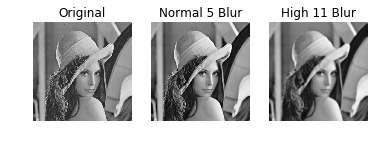

In [5]:
# write your code for Problem 1 here
def getGaussianKernel(w, s):
    
    #calculate sigma from variance
    sigma = math.sqrt(s)
    
    #create an appropriately sized kernel and initialize elements with 0
    g_kernel = np.zeros((w, w), dtype=np.float32)
    
    #sum for normalization
    kernel_sum = 0.0
    
    #populate the kernel with appropriate values
    for i in range(-(w/2), (w/2)+1):
        for j in range(-(w/2), (w/2)+1):
            #perform calc
            g_kernel[i+(w/2)][j+(w/2)] = (1/(2.0*sigma*sigma*math.pi))*(math.e ** (-(i*i + j*j)/(2.0*sigma*sigma)))
            kernel_sum+=g_kernel[i+(w/2)][j+(w/2)];
    
    
    #Normalize the kernel    
    for i in range(0,w):
        for j in range(0, w):
            g_kernel[i][j]/=kernel_sum;
            
    return g_kernel

img_lena = cv2.imread('lena.bmp')
img_lena_gray = cv2.cvtColor(img_lena, cv2.COLOR_BGR2GRAY)
img_road = cv2.imread('road.bmp')
img_road_gray = cv2.cvtColor(img_road, cv2.COLOR_BGR2GRAY)
img_bar = cv2.imread('barbara.bmp')
img_bar_gray = cv2.cvtColor(img_bar, cv2.COLOR_BGR2GRAY)
img_lena_noise = cv2.imread('lena_noise.bmp')
img_lena_gray_noise = cv2.cvtColor(img_lena_noise, cv2.COLOR_BGR2GRAY)
img_road_noise = cv2.imread('road_noise.bmp')
img_road_gray_noise = cv2.cvtColor(img_road_noise, cv2.COLOR_BGR2GRAY)
img_bar_noise = cv2.imread('barbara_noise.bmp')
img_bar_gray_noise = cv2.cvtColor(img_bar_noise, cv2.COLOR_BGR2GRAY)

#kernel with a size of 5*5 and variance = sigma = 1.0
kernel1 = getGaussianKernel(5,1.0)

#kernel with a size of 11*11 and variance = 9.0 and sigma = 3.0
kernel2 = getGaussianKernel(11,9.0)

plt.subplot(1, 3, 1)
plt.imshow(img_lena,cmap='gray')
plt.title('Original')
plt.axis("off")

#convolve with the first kernel
res_lena = cv2.filter2D(img_lena_gray, -1, kernel1)
plt.subplot(1, 3, 2)
plt.imshow(res_lena,cmap='gray')
plt.title('Normal 5 Blur')
plt.axis("off")

#convolve with the 2nd kernel
res_lena2 = cv2.filter2D(img_lena_gray, -1, kernel2)
plt.subplot(1, 3, 3)
plt.imshow(res_lena2,cmap='gray')
plt.title('High 11 Blur')
plt.axis("off")

In [6]:
'''The bigger the kernel size, the more smoothing of the image is observed'''

'The bigger the kernel size, the more smoothing of the image is observed'

'Once again, due to a larger filter, we obtain a smoother image and the salt and pepper noise is reduced'

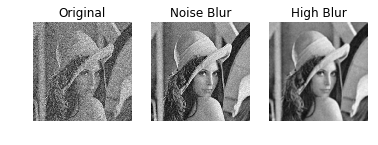

In [7]:
plt.subplot(1, 3, 1)
plt.imshow(img_lena_noise,cmap='gray')
plt.title('Original')
plt.axis("off")

#convolve all the images with the first kernel
res_lena_noise = cv2.filter2D(img_lena_gray_noise, -1, kernel1)
plt.subplot(1, 3, 2)
plt.imshow(res_lena_noise,cmap='gray')
plt.title('Noise Blur')
plt.axis("off")

#convolve the image with the 2nd kernel
res_lena_noise2 = cv2.filter2D(img_lena_gray_noise, -1, kernel2)
plt.subplot(1, 3, 3)
plt.imshow(res_lena_noise2,cmap='gray')
plt.title('High Blur')
plt.axis("off")

'''Once again, due to a larger filter, we obtain a smoother image and the salt and pepper noise is reduced'''

(-0.5, 1023.5, 767.5, -0.5)

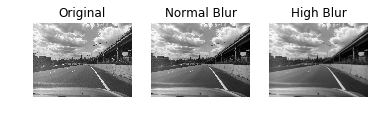

In [8]:
plt.subplot(1, 3, 1)
plt.imshow(img_road,cmap='gray')
plt.title('Original')
plt.axis("off")

#convolve with the first kernel
res_road = cv2.filter2D(img_road_gray, -1, kernel1)
plt.subplot(1, 3, 2)
plt.imshow(res_road,cmap='gray')
plt.title('Normal Blur')
plt.axis("off")

#convolve with the 2nd kernel
res_road2 = cv2.filter2D(img_road_gray, -1, kernel2)
plt.subplot(1, 3, 3)
plt.imshow(res_road2,cmap='gray')
plt.title('High Blur')
plt.axis("off")

(-0.5, 1023.5, 767.5, -0.5)

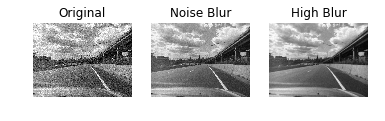

In [9]:
plt.subplot(1, 3, 1)
plt.imshow(img_road_noise,cmap='gray')
plt.title('Original')
plt.axis("off")

#convolve all the images with the first kernel
res_road_noise = cv2.filter2D(img_road_gray_noise, -1, kernel1)
plt.subplot(1, 3, 2)
plt.imshow(res_road_noise,cmap='gray')
plt.title('Noise Blur')
plt.axis("off")

#convolve the image with the 2nd kernel
res_road_noise2 = cv2.filter2D(img_road_gray_noise, -1, kernel2)
plt.subplot(1, 3, 3)
plt.imshow(res_road_noise2,cmap='gray')
plt.title('High Blur')
plt.axis("off")

(-0.5, 511.5, 511.5, -0.5)

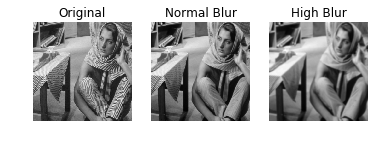

In [10]:
plt.subplot(1, 3, 1)
plt.imshow(img_bar,cmap='gray')
plt.title('Original')
plt.axis("off")

#convolve with the first kernel
res_bar = cv2.filter2D(img_bar_gray, -1, kernel1)
plt.subplot(1, 3, 2)
plt.imshow(res_bar,cmap='gray')
plt.title('Normal Blur')
plt.axis("off")

#convolve with the 2nd kernel
res_bar2 = cv2.filter2D(img_bar_gray, -1, kernel2)
plt.subplot(1, 3, 3)
plt.imshow(res_bar2,cmap='gray')
plt.title('High Blur')
plt.axis("off")

(-0.5, 511.5, 511.5, -0.5)

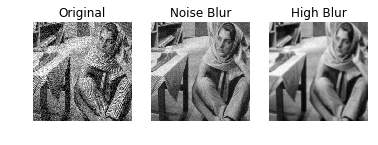

In [11]:
plt.subplot(1, 3, 1)
plt.imshow(img_bar_noise,cmap='gray')
plt.title('Original')
plt.axis("off")

#convolve all the images with the first kernel
res_bar_noise = cv2.filter2D(img_bar_gray_noise, -1, kernel1)
plt.subplot(1, 3, 2)
plt.imshow(res_bar_noise,cmap='gray')
plt.title('Noise Blur')
plt.axis("off")

#convolve the image with the 2nd kernel
res_bar_noise2 = cv2.filter2D(img_bar_gray_noise, -1, kernel2)
plt.subplot(1, 3, 3)
plt.imshow(res_bar_noise2,cmap='gray')
plt.title('High Blur')
plt.axis("off")

- **Problem 2 {15 pts}:** The Gaussian kernel is separable, which means that convolution with a 2D Gaussian can be accomplished by convolving the image with two 1D Gaussian, one in the x direction and another in the y direction. Repeat the 2 convolutions you did in question 1 using this scheme. You can still use `filter2D` to convolve the images with each of the 1D kernels. Verify that you get the same results that you did in question 1 by computing the maximum difference between the arrays produced with the two methods. Include your code and results in your Jupyter Notebook file. (You don't have to turn in the images for this part)

255


(-0.5, 511.5, 511.5, -0.5)

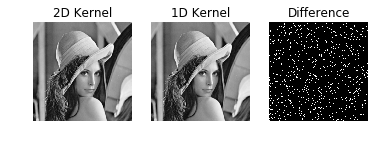

In [12]:
# write your code for Problem 2 here

#creating a 1D Gaussian
def getGaussianKernel1D(w, s):
    #calculate sigma from variance
    sigma = math.sqrt(s)
    #create an appropriately sized kernel and initialize elements with 0
    g_kernel = np.zeros((w,1), dtype=np.float32)
    
    #sum for normalization
    kernel_sum = 0.0
    
    #populate the kernel with appropriate values
    for i in range(-(w/2), (w/2)+1):
        #perform calc
        g_kernel[i+2] = (1/(sigma*math.sqrt(2*math.pi)))*(math.e ** (-(i*i)/(2*sigma*sigma)))
        kernel_sum+=g_kernel[i+2]
            
    #Normalize    
    for i in range(0,w):
        g_kernel[i]/=kernel_sum
            
    return g_kernel

#get the two kernels
mykernel1 = getGaussianKernel1D(5,1.0)

#convolution using the 5*1 kernel
res_1dlena1 = cv2.filter2D(img_lena_gray, -1, mykernel1)
#convolution using the 1*5 kernel
res_1dlena_final1 = cv2.filter2D(res_1dlena1, -1, mykernel1.transpose())

#convolution using the 5*1 kernel
res_1dlena2 = cv2.filter2D(img_lena_gray_noise, -1, mykernel1)
#convolution using the 1*5 kernel
res_1dlena_final2 = cv2.filter2D(res_1dlena2, -1, mykernel1.transpose())

diff = abs(np.subtract(res_lena, res_1dlena_final1))
print(np.amax(diff))

plt.subplot(1, 3, 1)
plt.imshow(res_lena,cmap='gray')
plt.title('2D Kernel')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(res_1dlena_final1,cmap='gray')
plt.title('1D Kernel')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(diff,cmap='gray')
plt.title('Difference')
plt.axis("off")

255


(-0.5, 511.5, 511.5, -0.5)

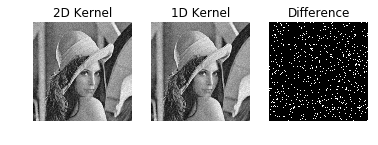

In [13]:
plt.subplot(1, 3, 1)
plt.imshow(res_lena_noise,cmap='gray')
plt.title('2D Kernel')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(res_1dlena_final2,cmap='gray')
plt.title('1D Kernel')
plt.axis("off")

diff2 = abs(np.subtract(res_lena_noise, res_1dlena_final2))
print(np.amax(diff))

plt.subplot(1, 3, 3)
plt.imshow(diff2,cmap='gray')
plt.title('Difference')
plt.axis("off")

In [14]:
'''The difference between the two convolutions is basically nil as the only difference observed is some random noise due to the convolution functions. The resulting images are visually identical.'''

'The difference between the two convolutions is basically nil as the only difference observed is some random noise due to the convolution functions. The resulting images are visually identical.'


- **Problem 3 {15 pts}:** Implement in Python the Sobel edge detector and apply it to the input image building.bmp. Then apply an appropriate threshold to the edge strength values to select what you think are the most important edges. Include your code and results in your Jupyter Notebook file.



c:\python\python27\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in ushort_scalars


(-0.5, 719.5, 569.5, -0.5)

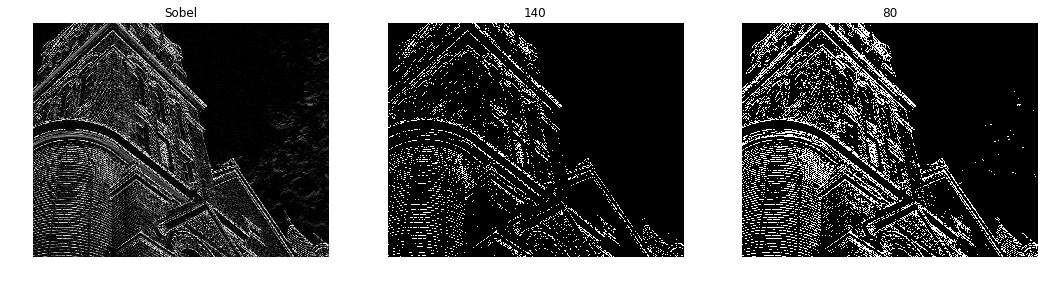

In [15]:
# write your code for Problem 3 here

#assuming that the 3*3 kernel size is used for convolution
arr1 = np.array([[-1,0,1],[2,0,-2],[-1,0,1]])
arr2 = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

img_building = cv2.imread('building.bmp')
w,h,c = img_building.shape

img_building_gray = cv2.cvtColor(img_building, cv2.COLOR_BGR2GRAY)

res_building1 = cv2.filter2D(img_building_gray, cv2.CV_16U, arr1)
res_building2 = cv2.filter2D(img_building_gray, cv2.CV_16U, arr2)

#array to store the result of the combination of the two covolutions
arr3 = np.zeros((w,h), dtype=np.uint16)

#array to store the rescaled values
arr4 = np.zeros((w,h), dtype=np.uint8)

maxval = 0
minval= 9999
for i in range(0,w):
    for j in range(0,h):
        arr3[i][j] = int(math.sqrt(res_building1[i][j]*res_building1[i][j] + res_building2[i][j]*res_building2[i][j]))
        if arr3[i][j]<minval:
            minval=arr3[i][j]
        if arr3[i][j]>=maxval:
            maxval=arr3[i][j]

#old and new ranges of intensity values
r1 = maxval-minval
r2 = 255

#rescaling to 0-255
for i in range(0,w):
    for j in range(0,h):
        arr4[i][j] = (((arr3[i][j]-minval)*(255-0))/(r1))

#image thresholding using global tresholder
img_bi = imThreshold(arr4, 140, 255)

plt.figure(figsize=(18,18))
plt.subplot(1, 3, 1)
plt.imshow(arr3, 'gray')
plt.title('Sobel')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img_bi, 'gray')
plt.title('140')
plt.axis("off")

img_bi_2 = imThreshold(arr4, 80, 255)
plt.subplot(1, 3, 3)
plt.imshow(img_bi_2, 'gray')
plt.title('80')
plt.axis("off")

(-0.5, 719.5, 569.5, -0.5)

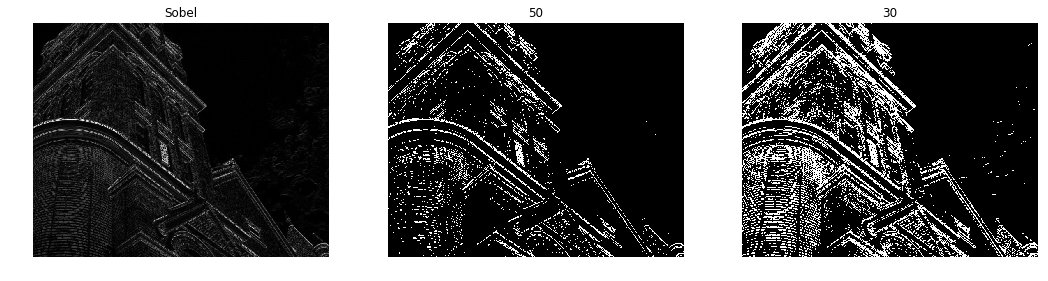

In [17]:
#assuming that the 3*3 kernel size is used for convolution
arr1 = np.array([[-1,0,1],[2,0,-2],[-1,0,1]])
arr2 = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

img_building = cv2.imread('building.bmp')
w,h,c = img_building.shape

img_building_gray = cv2.cvtColor(img_building, cv2.COLOR_BGR2GRAY)

res_building1 = cv2.filter2D(img_building_gray, cv2.CV_32F, arr1)
res_building2 = cv2.filter2D(img_building_gray, cv2.CV_32F, arr2)

#array to store the result of the combination of the two covolutions
arr3 = np.zeros((w,h), dtype=np.float32)

#array to store the rescaled values
arr4 = np.zeros((w,h), dtype=np.uint8)

maxval = 0
minval= 9999
for i in range(0,w):
    for j in range(0,h):
        arr3[i][j] = int(math.sqrt(res_building1[i][j]*res_building1[i][j] + res_building2[i][j]*res_building2[i][j]))
        if arr3[i][j]<minval:
            minval=arr3[i][j]
        if arr3[i][j]>=maxval:
            maxval=arr3[i][j]

#old and new ranges of intensity values
r1 = maxval-minval
r2 = 255

#rescaling to 0-255
for i in range(0,w):
    for j in range(0,h):
        arr4[i][j] = (((arr3[i][j]-minval)*(255-0))/(r1))

#image thresholding using global tresholder
img_bi = imThreshold(arr4, 50, 255)

plt.figure(figsize=(18,18))
plt.subplot(1, 3, 1)
plt.imshow(arr3, 'gray')
plt.title('Sobel')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img_bi, 'gray')
plt.title('50')
plt.axis("off")

img_bi_2 = imThreshold(arr4, 30, 255)
plt.subplot(1, 3, 3)
plt.imshow(img_bi_2, 'gray')
plt.title('30')
plt.axis("off")

'The usage of different data type for the convolutions results in slightly different images.Also, the details are better observed when only one image is observed. Smaller images result in bad looking results on the screen'

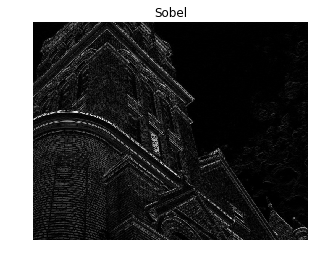

In [18]:
plt.subplot(1, 1, 1)
plt.imshow(arr3, 'gray')
plt.title('Sobel')
plt.axis("off")

'''The usage of different data type for the convolutions results in slightly different images.Also, the details are better observed when only one image is observed. Smaller images result in bad looking results on the screen'''

- **Problem 4 {5 pts}:** Convolve an 11 by 11 Gaussian of sigma = 1 with the discrete approximation to the Laplacian kernel (i.e., [0 1 0; 1 -4 1; 0 1 0] or [1 1 1; 1 -8 1; 1 1 1]). Plot this 2D function using the `Matplotlib` function `plot` . Turn in this 3D plot using the `Matplotlib` function `plot_surface`. Do you see why this is referred to as the Mexican hat filter? Include your code and results in your Jupyter Notebook file.



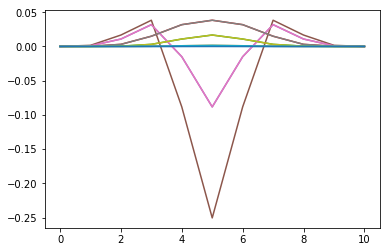

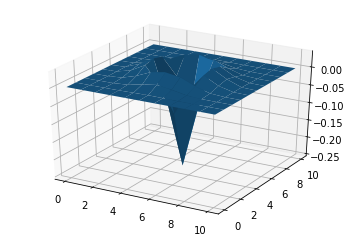

In [19]:
# write your code for Problem 4 here

gaus_kernel = getGaussianKernel(11, 1.0)

lap1 = np.array([[0,1,0],[1,-4,1],[0,1,0]])
lap2 = np.array([[1,1,1],[1,-8,1],[1,1,1]])

mexican_hat = cv2.filter2D(gaus_kernel,-1,lap1)

#simple 2D plot
plt.plot(mexican_hat)

X,Y = np.meshgrid(range(11),range(11))
fig = plt.figure()
q = fig.add_subplot(111,projection='3d')
#surface plot to get the 'Mexican Hat'
q.plot_surface(X,Y,mexican_hat,rstride=1, cstride=1, alpha=None,antialiased=True)
plt.show()

- **Problem 5 {15 pts}:** Implement in Python an edge detector based on locating the zero crossings of the Laplacian. More specifically, write a routine that first convolves the input image with the Mexican hat kernel you produced in question 4 then searches the output array for locations where the value changes from positive to negative between neighboring pixels and the magnitude of the change is greater than some specified threshold. Test your program on the building image and find a threshold value which seems to yield acceptable results. Include your code and results in your Jupyter Notebook file.


(-0.5, 721.5, 571.5, -0.5)

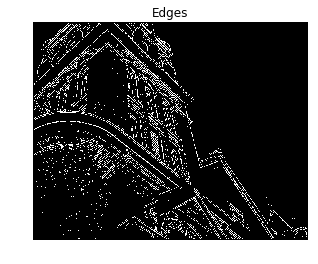

In [20]:
# write your code for Problem 5 here

#convolve the grascale building image with the mexican hat filter
mexican_building = cv2.filter2D(img_building_gray,cv2.CV_16S,mexican_hat)

#calculate width and height of the input image
w,h=mexican_building.shape

#output matrix containing the thresholded result
mexican_building_res_final = np.zeros((w+2,h+2), dtype=np.uint8)

#padding the image for easier calculation
mexican_building_res_temp = np.pad(mexican_building,(1,1),'minimum')

max_diff = 25

for i in range(2,w):
    for j in range(2,h):
        val1 = mexican_building_res_temp[i][j]
        val2 = mexican_building_res_temp[i-1][j-1]
        val3 = mexican_building_res_temp[i-1][j]
        val4 = mexican_building_res_temp[i-1][j+1]
        val5 = mexican_building_res_temp[i][j-1]
        val6 = mexican_building_res_temp[i][j+1]
        val7 = mexican_building_res_temp[i+1][j-1]
        val8 = mexican_building_res_temp[i+1][j]
        val9 = mexican_building_res_temp[i+1][j+1]
        if(val1>0):
            if(val2<0):
                diff = abs(val1-val2)
                if(diff > max_diff):
                    mexican_building_res_final[i][j] = 255
            if(val3<0):
                diff = abs(val1-val3)
                if(diff > max_diff):
                    mexican_building_res_final[i][j] = 255
            if(val4<0):
                diff = abs(val1-val4)
                if(diff > max_diff):
                    mexican_building_res_final[i][j] = 255
            if(val5<0):
                diff = abs(val1-val5)
                if(diff > max_diff):
                    mexican_building_res_final[i][j] = 255
            if(val6<0):
                diff = abs(val1-val6)
                if(diff > max_diff):
                    mexican_building_res_final[i][j] = 255
            if(val7<0):
                diff = abs(val1-val7)
                if(diff > max_diff):
                    mexican_building_res_final[i][j] = 255
            if(val8<0):
                diff = abs(val1-val8)
                if(diff > max_diff):
                    mexican_building_res_final[i][j] = 255
            if(val9<0):
                diff = abs(val1-val9)
                if(diff > max_diff):
                    mexican_building_res_final[i][j] = 255

plt.subplot(1, 1, 1)
plt.imshow(mexican_building_res_final,cmap='gray')
plt.title('Edges')
plt.axis("off")

(-0.5, 513.5, 513.5, -0.5)

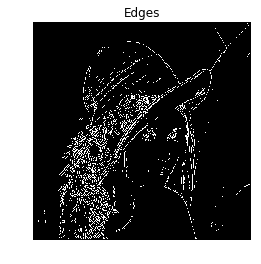

In [21]:
#lena

#convolve the grascale building image with the mexican hat filter
mexican_building = cv2.filter2D(img_lena_gray,cv2.CV_16S,mexican_hat)

#calculate width and height of the input image
w,h=mexican_building.shape

#output matrix containing the thresholded result
mexican_building_res_final = np.zeros((w+2,h+2), dtype=np.uint8)

#padding the image for easier calculation
mexican_building_res_temp = np.pad(mexican_building,(1,1),'minimum')

max_diff = 10

for i in range(2,w):
    for j in range(2,h):
        val1 = mexican_building_res_temp[i][j]
        val2 = mexican_building_res_temp[i-1][j-1]
        val3 = mexican_building_res_temp[i-1][j]
        val4 = mexican_building_res_temp[i-1][j+1]
        val5 = mexican_building_res_temp[i][j-1]
        val6 = mexican_building_res_temp[i][j+1]
        val7 = mexican_building_res_temp[i+1][j-1]
        val8 = mexican_building_res_temp[i+1][j]
        val9 = mexican_building_res_temp[i+1][j+1]
        if(val1>0):
            if(val2<0):
                diff = abs(val1-val2)
                if(diff > max_diff):
                    mexican_building_res_final[i][j] = 255
            if(val3<0):
                diff = abs(val1-val3)
                if(diff > max_diff):
                    mexican_building_res_final[i][j] = 255
            if(val4<0):
                diff = abs(val1-val4)
                if(diff > max_diff):
                    mexican_building_res_final[i][j] = 255
            if(val5<0):
                diff = abs(val1-val5)
                if(diff > max_diff):
                    mexican_building_res_final[i][j] = 255
            if(val6<0):
                diff = abs(val1-val6)
                if(diff > max_diff):
                    mexican_building_res_final[i][j] = 255
            if(val7<0):
                diff = abs(val1-val7)
                if(diff > max_diff):
                    mexican_building_res_final[i][j] = 255
            if(val8<0):
                diff = abs(val1-val8)
                if(diff > max_diff):
                    mexican_building_res_final[i][j] = 255
            if(val9<0):
                diff = abs(val1-val9)
                if(diff > max_diff):
                    mexican_building_res_final[i][j] = 255

plt.subplot(1, 1, 1)
plt.imshow(mexican_building_res_final,cmap='gray')
plt.title('Edges')
plt.axis("off")

(-0.5, 1025.5, 769.5, -0.5)

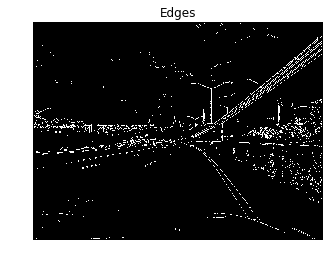

In [22]:
#road

#convolve the grascale building image with the mexican hat filter
mexican_building = cv2.filter2D(img_road_gray,cv2.CV_16S,mexican_hat)

#calculate width and height of the input image
w,h=mexican_building.shape

#output matrix containing the thresholded result
mexican_building_res_final = np.zeros((w+2,h+2), dtype=np.uint8)

#padding the image for easier calculation
mexican_building_res_temp = np.pad(mexican_building,(1,1),'minimum')

max_diff = 15

for i in range(2,w):
    for j in range(2,h):
        val1 = mexican_building_res_temp[i][j]
        val2 = mexican_building_res_temp[i-1][j-1]
        val3 = mexican_building_res_temp[i-1][j]
        val4 = mexican_building_res_temp[i-1][j+1]
        val5 = mexican_building_res_temp[i][j-1]
        val6 = mexican_building_res_temp[i][j+1]
        val7 = mexican_building_res_temp[i+1][j-1]
        val8 = mexican_building_res_temp[i+1][j]
        val9 = mexican_building_res_temp[i+1][j+1]
        if(val1>0):
            if(val2<0):
                diff = abs(val1-val2)
                if(diff > max_diff):
                    mexican_building_res_final[i][j] = 255
            if(val3<0):
                diff = abs(val1-val3)
                if(diff > max_diff):
                    mexican_building_res_final[i][j] = 255
            if(val4<0):
                diff = abs(val1-val4)
                if(diff > max_diff):
                    mexican_building_res_final[i][j] = 255
            if(val5<0):
                diff = abs(val1-val5)
                if(diff > max_diff):
                    mexican_building_res_final[i][j] = 255
            if(val6<0):
                diff = abs(val1-val6)
                if(diff > max_diff):
                    mexican_building_res_final[i][j] = 255
            if(val7<0):
                diff = abs(val1-val7)
                if(diff > max_diff):
                    mexican_building_res_final[i][j] = 255
            if(val8<0):
                diff = abs(val1-val8)
                if(diff > max_diff):
                    mexican_building_res_final[i][j] = 255
            if(val9<0):
                diff = abs(val1-val9)
                if(diff > max_diff):
                    mexican_building_res_final[i][j] = 255

plt.subplot(1, 1, 1)
plt.imshow(mexican_building_res_final,cmap='gray')
plt.title('Edges')
plt.axis("off")

- **Problem 6 {35 pts}:** Implement in Python the first two steps of the Canny edge extraction algorithm: CANNY_ENHANCER(Gaussian filtering & finding magnitude and orientation of gradient) and NONMAX_SUPPRESSION. Apply these steps to all of the images then apply an appropriate threshold to the edge strength values to select what you think are the most important edges. Compare the outputs from the original images and the noisy ones. Also compare the outputs for images between the zero crossing and Canny detectors. Include your code and results in your Jupyter Notebook file.


In [23]:
'''The images for the zero crossings are displayed before this segment. Canny results are provided in the following segments'''

'The images for the zero crossings are displayed before this segment. Canny results are provided in the following segments'

(-0.5, 511.5, 511.5, -0.5)

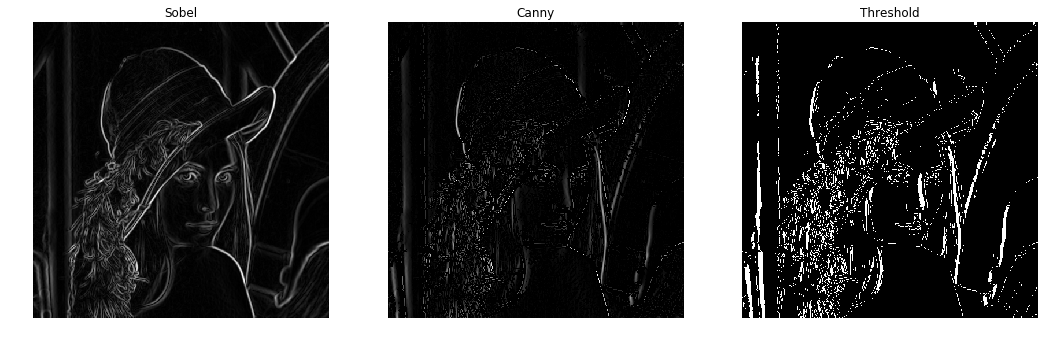

In [24]:
# write your code for Problem 6 here

#lena

#blurring the image with a 5*5 gaussian to remove noise
gaus_kernel_canny = getGaussianKernel(5,1.0)
blurred_lena = cv2.filter2D(img_lena_gray,cv2.CV_32F,gaus_kernel_canny)

w,h = img_lena_gray.shape

#applying the sobel operator
sob1 = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
sob2 = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
sobel_lena1 = cv2.filter2D(blurred_lena, cv2.CV_32F, sob1)
sobel_lena2 = cv2.filter2D(blurred_lena, cv2.CV_32F, sob2)

#array to store the edge gradient
gradient_lena = np.zeros((w,h), dtype=np.float32)
#array to store the angle
angle_lena = np.zeros((w,h), dtype=np.float32)
#array to store the direction of the edge
edir = np.zeros((w,h),dtype=np.uint8)

#calculate the gradient and angles(in degrees)
for i in range(0,w):
    for j in range(0,h):
        gradient_lena[i][j] = int(math.sqrt(sobel_lena1[i][j]*sobel_lena1[i][j] + sobel_lena2[i][j]*sobel_lena2[i][j]))
        angle_lena[i][j] = np.degrees(np.arctan2(sobel_lena2[i][j],sobel_lena1[i][j]))

canny_lena = gradient_lena.copy()        

#Non-Maximum suppression using 4 directions: vertical, horizontal and 2 diagonals
for i in range(0,w):
    for j in range(0,h):
        if (i==0):
            val_up = 0.0
            val_up_left = 0.0
            val_up_right = 0.0
        if (j==0):
            val_left = 0.0
            val_up_left = 0.0
            val_down_left = 0.0
        if (i==(w-1)):
            val_down = 0.0
            val_down_left = 0.0
            val_down_right = 0.0
        if (j==(h-1)):
            val_right = 0.0
            val_up_right = 0.0
            val_down_right = 0.0
        
        val_cent = gradient_lena[i][j]
        
        #vertical
        if(((angle_lena[i][j]>=67.5) and (angle_lena[i][j]<=112.5)) or ((angle_lena[i][j]<=(-67.5)) and (angle_lena[i][j]>=(-112.5)))):
            edir[i][j] = 1
            if (i!=0):
                val_up = gradient_lena[i-1][j]
            if (i!=(w-1)):
                val_down = gradient_lena[i+1][j]
            if ((val_cent<=val_up) or (val_cent<=val_down)):
                canny_lena[i][j] = 0.0
        
        #horizontal
        if(((angle_lena[i][j]>=(-22.5)) and (angle_lena[i][j]<=22.5)) or ((angle_lena[i][j]>=(157.5)) and (angle_lena[i][j]<=(-157.5)))):
            edir[i][j] = 2
            if (j!=0):
                val_left = gradient_lena[i][j-1]
            if (j!=(h-1)):
                val_right = gradient_lena[i][j+1]
            if ((val_cent<=val_left) or (val_cent<=val_right)):
                canny_lena[i][j] = 0.0
        
        #Diagonal 1
        if(((angle_lena[i][j]>22.5) and (angle_lena[i][j]<67.5)) or ((angle_lena[i][j]<(-112.5)) and (angle_lena[i][j]>(-157.5)))):
            edir[i][j] = 3
            if ((i!=(w-1)) and(j!=0)):
                val_down_left = gradient_lena[i+1][j-1]
            if ((i!=(0)) and(j!=(h-1))):
                val_up_right = gradient_lena[i-1][j+1]
            if ((val_cent<=val_down_left) or (val_cent<=val_up_right)):
                canny_lena[i][j] = 0.0
        
        #Diagonal 2
        if(((angle_lena[i][j]>112.5) and (angle_lena[i][j]<157.5)) or ((angle_lena[i][j]<(-22.5)) and (angle_lena[i][j]>(-67.5)))):
            edir[i][j] = 4
            if ((i!=(0)) and(j!=(0))):
                val_up_left = gradient_lena[i-1][j-1]
            if ((i!=(w-1)) and(j!=(h-1))):
                val_down_right = gradient_lena[i+1][j+1]
            if ((val_cent<=val_up_left) or (val_cent<=val_down_right)):
                canny_lena[i][j] = 0.0
                
canny_lena_t = imThreshold(canny_lena,55,255)

plt.figure(figsize=(18,18))
plt.subplot(131)
plt.imshow(gradient_lena,cmap='gray')
plt.title('Sobel')
plt.axis("off")

plt.subplot(132)
plt.imshow(canny_lena,cmap='gray')
plt.title('Canny')
plt.axis("off")

plt.subplot(133)
plt.imshow(canny_lena_t,cmap='gray')
plt.title('Threshold')
plt.axis("off")

(-0.5, 511.5, 511.5, -0.5)

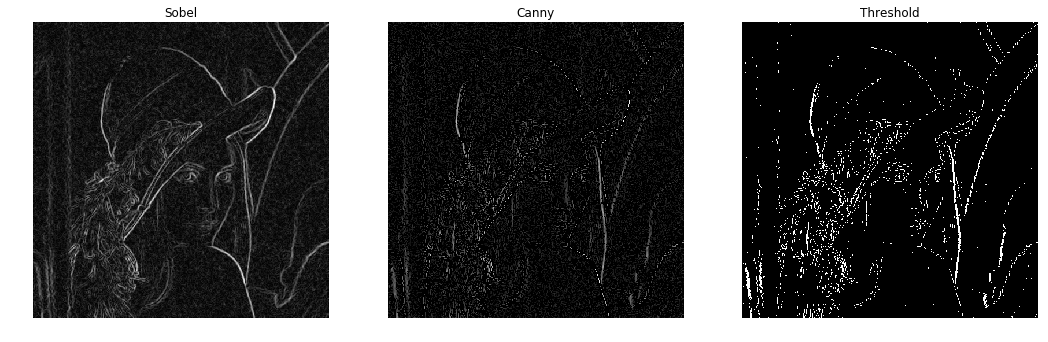

In [25]:
#lena noise

#blurring the image with a 5*5 gaussian to remove noise
gaus_kernel_canny = getGaussianKernel(5,1.0)
blurred_lena = cv2.filter2D(img_lena_gray_noise,cv2.CV_32F,gaus_kernel_canny)

w,h = img_lena_gray_noise.shape

#applying the sobel operator
sob1 = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
sob2 = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
sobel_lena1 = cv2.filter2D(blurred_lena, cv2.CV_32F, sob1)
sobel_lena2 = cv2.filter2D(blurred_lena, cv2.CV_32F, sob2)

#array to store the edge gradient
gradient_lena = np.zeros((w,h), dtype=np.float32)
#array to store the angle
angle_lena = np.zeros((w,h), dtype=np.float32)
#array to store the direction of the edge
edir = np.zeros((w,h),dtype=np.uint8)

#calculate the gradient and angles(in degrees)
for i in range(0,w):
    for j in range(0,h):
        gradient_lena[i][j] = int(math.sqrt(sobel_lena1[i][j]*sobel_lena1[i][j] + sobel_lena2[i][j]*sobel_lena2[i][j]))
        angle_lena[i][j] = np.degrees(np.arctan2(sobel_lena2[i][j],sobel_lena1[i][j]))

canny_lena = gradient_lena.copy()        

#Non-Maximum suppression using 4 directions: vertical, horizontal and 2 diagonals
for i in range(0,w):
    for j in range(0,h):
        if (i==0):
            val_up = 0.0
            val_up_left = 0.0
            val_up_right = 0.0
        if (j==0):
            val_left = 0.0
            val_up_left = 0.0
            val_down_left = 0.0
        if (i==(w-1)):
            val_down = 0.0
            val_down_left = 0.0
            val_down_right = 0.0
        if (j==(h-1)):
            val_right = 0.0
            val_up_right = 0.0
            val_down_right = 0.0
        
        val_cent = gradient_lena[i][j]
        
        #vertical
        if(((angle_lena[i][j]>=67.5) and (angle_lena[i][j]<=112.5)) or ((angle_lena[i][j]<=(-67.5)) and (angle_lena[i][j]>=(-112.5)))):
            edir[i][j] = 1
            if (i!=0):
                val_up = gradient_lena[i-1][j]
            if (i!=(w-1)):
                val_down = gradient_lena[i+1][j]
            if ((val_cent<=val_up) or (val_cent<=val_down)):
                canny_lena[i][j] = 0.0
        
        #horizontal
        if(((angle_lena[i][j]>=(-22.5)) and (angle_lena[i][j]<=22.5)) or ((angle_lena[i][j]>=(157.5)) and (angle_lena[i][j]<=(-157.5)))):
            edir[i][j] = 2
            if (j!=0):
                val_left = gradient_lena[i][j-1]
            if (j!=(h-1)):
                val_right = gradient_lena[i][j+1]
            if ((val_cent<=val_left) or (val_cent<=val_right)):
                canny_lena[i][j] = 0.0
        
        #Diagonal 1
        if(((angle_lena[i][j]>22.5) and (angle_lena[i][j]<67.5)) or ((angle_lena[i][j]<(-112.5)) and (angle_lena[i][j]>(-157.5)))):
            edir[i][j] = 3
            if ((i!=(w-1)) and(j!=0)):
                val_down_left = gradient_lena[i+1][j-1]
            if ((i!=(0)) and(j!=(h-1))):
                val_up_right = gradient_lena[i-1][j+1]
            if ((val_cent<=val_down_left) or (val_cent<=val_up_right)):
                canny_lena[i][j] = 0.0
        
        #Diagonal 2
        if(((angle_lena[i][j]>112.5) and (angle_lena[i][j]<157.5)) or ((angle_lena[i][j]<(-22.5)) and (angle_lena[i][j]>(-67.5)))):
            edir[i][j] = 4
            if ((i!=(0)) and(j!=(0))):
                val_up_left = gradient_lena[i-1][j-1]
            if ((i!=(w-1)) and(j!=(h-1))):
                val_down_right = gradient_lena[i+1][j+1]
            if ((val_cent<=val_up_left) or (val_cent<=val_down_right)):
                canny_lena[i][j] = 0.0
                
canny_lena_t = imThreshold(canny_lena,80,255)

plt.figure(figsize=(18,18))
plt.subplot(131)
plt.imshow(gradient_lena,cmap='gray')
plt.title('Sobel')
plt.axis("off")

plt.subplot(132)
plt.imshow(canny_lena,cmap='gray')
plt.title('Canny')
plt.axis("off")

plt.subplot(133)
plt.imshow(canny_lena_t,cmap='gray')
plt.title('Threshold')
plt.axis("off")

(-0.5, 719.5, 569.5, -0.5)

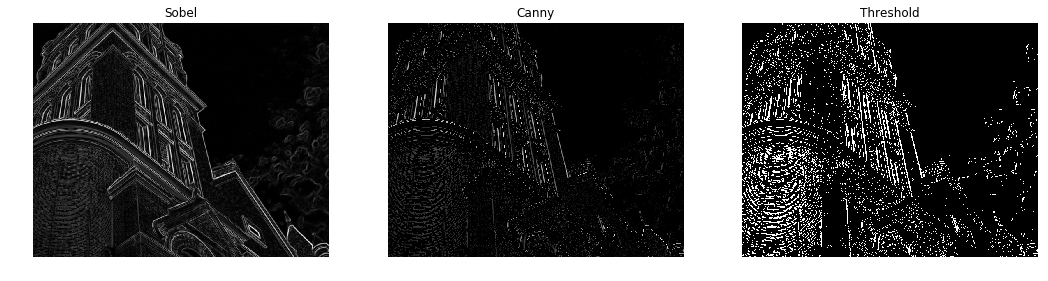

In [26]:
#building

#blurring the image with a 5*5 gaussian to remove noise
gaus_kernel_canny = getGaussianKernel(5,1.0)
blurred_lena = cv2.filter2D(img_building_gray,cv2.CV_32F,gaus_kernel_canny)

w,h = img_building_gray.shape

#applying the sobel operator
sob1 = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
sob2 = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
sobel_lena1 = cv2.filter2D(blurred_lena, cv2.CV_32F, sob1)
sobel_lena2 = cv2.filter2D(blurred_lena, cv2.CV_32F, sob2)

#array to store the edge gradient
gradient_lena = np.zeros((w,h), dtype=np.float32)
#array to store the angle
angle_lena = np.zeros((w,h), dtype=np.float32)
#array to store the direction of the edge
edir = np.zeros((w,h),dtype=np.uint8)

#calculate the gradient and angles(in degrees)
for i in range(0,w):
    for j in range(0,h):
        gradient_lena[i][j] = int(math.sqrt(sobel_lena1[i][j]*sobel_lena1[i][j] + sobel_lena2[i][j]*sobel_lena2[i][j]))
        angle_lena[i][j] = np.degrees(np.arctan2(sobel_lena2[i][j],sobel_lena1[i][j]))

canny_lena = gradient_lena.copy()        

#Non-Maximum suppression using 4 directions: vertical, horizontal and 2 diagonals
for i in range(0,w):
    for j in range(0,h):
        if (i==0):
            val_up = 0.0
            val_up_left = 0.0
            val_up_right = 0.0
        if (j==0):
            val_left = 0.0
            val_up_left = 0.0
            val_down_left = 0.0
        if (i==(w-1)):
            val_down = 0.0
            val_down_left = 0.0
            val_down_right = 0.0
        if (j==(h-1)):
            val_right = 0.0
            val_up_right = 0.0
            val_down_right = 0.0
        
        val_cent = gradient_lena[i][j]
        
        #vertical
        if(((angle_lena[i][j]>=67.5) and (angle_lena[i][j]<=112.5)) or ((angle_lena[i][j]<=(-67.5)) and (angle_lena[i][j]>=(-112.5)))):
            edir[i][j] = 1
            if (i!=0):
                val_up = gradient_lena[i-1][j]
            if (i!=(w-1)):
                val_down = gradient_lena[i+1][j]
            if ((val_cent<=val_up) or (val_cent<=val_down)):
                canny_lena[i][j] = 0.0
        
        #horizontal
        if(((angle_lena[i][j]>=(-22.5)) and (angle_lena[i][j]<=22.5)) or ((angle_lena[i][j]>=(157.5)) and (angle_lena[i][j]<=(-157.5)))):
            edir[i][j] = 2
            if (j!=0):
                val_left = gradient_lena[i][j-1]
            if (j!=(h-1)):
                val_right = gradient_lena[i][j+1]
            if ((val_cent<=val_left) or (val_cent<=val_right)):
                canny_lena[i][j] = 0.0
        
        #Diagonal 1
        if(((angle_lena[i][j]>22.5) and (angle_lena[i][j]<67.5)) or ((angle_lena[i][j]<(-112.5)) and (angle_lena[i][j]>(-157.5)))):
            edir[i][j] = 3
            if ((i!=(w-1)) and(j!=0)):
                val_down_left = gradient_lena[i+1][j-1]
            if ((i!=(0)) and(j!=(h-1))):
                val_up_right = gradient_lena[i-1][j+1]
            if ((val_cent<=val_down_left) or (val_cent<=val_up_right)):
                canny_lena[i][j] = 0.0
        
        #Diagonal 2
        if(((angle_lena[i][j]>112.5) and (angle_lena[i][j]<157.5)) or ((angle_lena[i][j]<(-22.5)) and (angle_lena[i][j]>(-67.5)))):
            edir[i][j] = 4
            if ((i!=(0)) and(j!=(0))):
                val_up_left = gradient_lena[i-1][j-1]
            if ((i!=(w-1)) and(j!=(h-1))):
                val_down_right = gradient_lena[i+1][j+1]
            if ((val_cent<=val_up_left) or (val_cent<=val_down_right)):
                canny_lena[i][j] = 0.0
                
canny_lena_t = imThreshold(canny_lena,55,255)

plt.figure(figsize=(18,18))
plt.subplot(131)
plt.imshow(gradient_lena,cmap='gray')
plt.title('Sobel')
plt.axis("off")

plt.subplot(132)
plt.imshow(canny_lena,cmap='gray')
plt.title('Canny')
plt.axis("off")

plt.subplot(133)
plt.imshow(canny_lena_t,cmap='gray')
plt.title('Threshold')
plt.axis("off")

(-0.5, 1023.5, 767.5, -0.5)

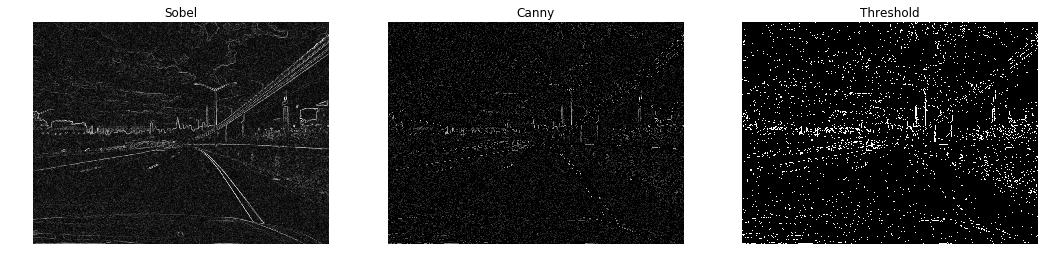

In [27]:
#Road Noise

#blurring the image with a 5*5 gaussian to remove noise
gaus_kernel_canny = getGaussianKernel(5,1.0)
blurred_lena = cv2.filter2D(img_road_gray_noise,cv2.CV_32F,gaus_kernel_canny)

w,h = img_road_gray_noise.shape

#applying the sobel operator
sob1 = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
sob2 = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
sobel_lena1 = cv2.filter2D(blurred_lena, cv2.CV_32F, sob1)
sobel_lena2 = cv2.filter2D(blurred_lena, cv2.CV_32F, sob2)

#array to store the edge gradient
gradient_lena = np.zeros((w,h), dtype=np.float32)
#array to store the angle
angle_lena = np.zeros((w,h), dtype=np.float32)
#array to store the direction of the edge
edir = np.zeros((w,h),dtype=np.uint8)

#calculate the gradient and angles(in degrees)
for i in range(0,w):
    for j in range(0,h):
        gradient_lena[i][j] = int(math.sqrt(sobel_lena1[i][j]*sobel_lena1[i][j] + sobel_lena2[i][j]*sobel_lena2[i][j]))
        angle_lena[i][j] = np.degrees(np.arctan2(sobel_lena2[i][j],sobel_lena1[i][j]))

canny_lena = gradient_lena.copy()        

#Non-Maximum suppression using 4 directions: vertical, horizontal and 2 diagonals
for i in range(0,w):
    for j in range(0,h):
        if (i==0):
            val_up = 0.0
            val_up_left = 0.0
            val_up_right = 0.0
        if (j==0):
            val_left = 0.0
            val_up_left = 0.0
            val_down_left = 0.0
        if (i==(w-1)):
            val_down = 0.0
            val_down_left = 0.0
            val_down_right = 0.0
        if (j==(h-1)):
            val_right = 0.0
            val_up_right = 0.0
            val_down_right = 0.0
        
        val_cent = gradient_lena[i][j]
        
        #vertical
        if(((angle_lena[i][j]>=67.5) and (angle_lena[i][j]<=112.5)) or ((angle_lena[i][j]<=(-67.5)) and (angle_lena[i][j]>=(-112.5)))):
            edir[i][j] = 1
            if (i!=0):
                val_up = gradient_lena[i-1][j]
            if (i!=(w-1)):
                val_down = gradient_lena[i+1][j]
            if ((val_cent<=val_up) or (val_cent<=val_down)):
                canny_lena[i][j] = 0.0
        
        #horizontal
        if(((angle_lena[i][j]>=(-22.5)) and (angle_lena[i][j]<=22.5)) or ((angle_lena[i][j]>=(157.5)) and (angle_lena[i][j]<=(-157.5)))):
            edir[i][j] = 2
            if (j!=0):
                val_left = gradient_lena[i][j-1]
            if (j!=(h-1)):
                val_right = gradient_lena[i][j+1]
            if ((val_cent<=val_left) or (val_cent<=val_right)):
                canny_lena[i][j] = 0.0
        
        #Diagonal 1
        if(((angle_lena[i][j]>22.5) and (angle_lena[i][j]<67.5)) or ((angle_lena[i][j]<(-112.5)) and (angle_lena[i][j]>(-157.5)))):
            edir[i][j] = 3
            if ((i!=(w-1)) and(j!=0)):
                val_down_left = gradient_lena[i+1][j-1]
            if ((i!=(0)) and(j!=(h-1))):
                val_up_right = gradient_lena[i-1][j+1]
            if ((val_cent<=val_down_left) or (val_cent<=val_up_right)):
                canny_lena[i][j] = 0.0
        
        #Diagonal 2
        if(((angle_lena[i][j]>112.5) and (angle_lena[i][j]<157.5)) or ((angle_lena[i][j]<(-22.5)) and (angle_lena[i][j]>(-67.5)))):
            edir[i][j] = 4
            if ((i!=(0)) and(j!=(0))):
                val_up_left = gradient_lena[i-1][j-1]
            if ((i!=(w-1)) and(j!=(h-1))):
                val_down_right = gradient_lena[i+1][j+1]
            if ((val_cent<=val_up_left) or (val_cent<=val_down_right)):
                canny_lena[i][j] = 0.0
                
canny_lena_t = imThreshold(canny_lena,85,255)

plt.figure(figsize=(18,18))
plt.subplot(131)
plt.imshow(gradient_lena,cmap='gray')
plt.title('Sobel')
plt.axis("off")

plt.subplot(132)
plt.imshow(canny_lena,cmap='gray')
plt.title('Canny')
plt.axis("off")

plt.subplot(133)
plt.imshow(canny_lena_t,cmap='gray')
plt.title('Threshold')
plt.axis("off")

(-0.5, 1023.5, 767.5, -0.5)

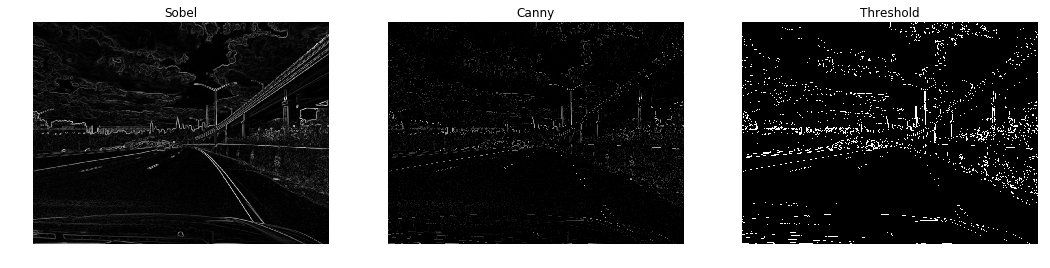

In [28]:
#Road

#blurring the image with a 5*5 gaussian to remove noise
gaus_kernel_canny = getGaussianKernel(5,1.0)
blurred_lena = cv2.filter2D(img_road_gray,cv2.CV_32F,gaus_kernel_canny)

w,h = img_road_gray.shape

#applying the sobel operator
sob1 = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
sob2 = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
sobel_lena1 = cv2.filter2D(blurred_lena, cv2.CV_32F, sob1)
sobel_lena2 = cv2.filter2D(blurred_lena, cv2.CV_32F, sob2)

#array to store the edge gradient
gradient_lena = np.zeros((w,h), dtype=np.float32)
#array to store the angle
angle_lena = np.zeros((w,h), dtype=np.float32)
#array to store the direction of the edge
edir = np.zeros((w,h),dtype=np.uint8)

#calculate the gradient and angles(in degrees)
for i in range(0,w):
    for j in range(0,h):
        gradient_lena[i][j] = int(math.sqrt(sobel_lena1[i][j]*sobel_lena1[i][j] + sobel_lena2[i][j]*sobel_lena2[i][j]))
        angle_lena[i][j] = np.degrees(np.arctan2(sobel_lena2[i][j],sobel_lena1[i][j]))

canny_lena = gradient_lena.copy()        

#Non-Maximum suppression using 4 directions: vertical, horizontal and 2 diagonals
for i in range(0,w):
    for j in range(0,h):
        if (i==0):
            val_up = 0.0
            val_up_left = 0.0
            val_up_right = 0.0
        if (j==0):
            val_left = 0.0
            val_up_left = 0.0
            val_down_left = 0.0
        if (i==(w-1)):
            val_down = 0.0
            val_down_left = 0.0
            val_down_right = 0.0
        if (j==(h-1)):
            val_right = 0.0
            val_up_right = 0.0
            val_down_right = 0.0
        
        val_cent = gradient_lena[i][j]
        
        #vertical
        if(((angle_lena[i][j]>=67.5) and (angle_lena[i][j]<=112.5)) or ((angle_lena[i][j]<=(-67.5)) and (angle_lena[i][j]>=(-112.5)))):
            edir[i][j] = 1
            if (i!=0):
                val_up = gradient_lena[i-1][j]
            if (i!=(w-1)):
                val_down = gradient_lena[i+1][j]
            if ((val_cent<=val_up) or (val_cent<=val_down)):
                canny_lena[i][j] = 0.0
        
        #horizontal
        if(((angle_lena[i][j]>=(-22.5)) and (angle_lena[i][j]<=22.5)) or ((angle_lena[i][j]>=(157.5)) and (angle_lena[i][j]<=(-157.5)))):
            edir[i][j] = 2
            if (j!=0):
                val_left = gradient_lena[i][j-1]
            if (j!=(h-1)):
                val_right = gradient_lena[i][j+1]
            if ((val_cent<=val_left) or (val_cent<=val_right)):
                canny_lena[i][j] = 0.0
        
        #Diagonal 1
        if(((angle_lena[i][j]>22.5) and (angle_lena[i][j]<67.5)) or ((angle_lena[i][j]<(-112.5)) and (angle_lena[i][j]>(-157.5)))):
            edir[i][j] = 3
            if ((i!=(w-1)) and(j!=0)):
                val_down_left = gradient_lena[i+1][j-1]
            if ((i!=(0)) and(j!=(h-1))):
                val_up_right = gradient_lena[i-1][j+1]
            if ((val_cent<=val_down_left) or (val_cent<=val_up_right)):
                canny_lena[i][j] = 0.0
        
        #Diagonal 2
        if(((angle_lena[i][j]>112.5) and (angle_lena[i][j]<157.5)) or ((angle_lena[i][j]<(-22.5)) and (angle_lena[i][j]>(-67.5)))):
            edir[i][j] = 4
            if ((i!=(0)) and(j!=(0))):
                val_up_left = gradient_lena[i-1][j-1]
            if ((i!=(w-1)) and(j!=(h-1))):
                val_down_right = gradient_lena[i+1][j+1]
            if ((val_cent<=val_up_left) or (val_cent<=val_down_right)):
                canny_lena[i][j] = 0.0
                
canny_lena_t = imThreshold(canny_lena,55,255)

plt.figure(figsize=(18,18))
plt.subplot(131)
plt.imshow(gradient_lena,cmap='gray')
plt.title('Sobel')
plt.axis("off")

plt.subplot(132)
plt.imshow(canny_lena,cmap='gray')
plt.title('Canny')
plt.axis("off")

plt.subplot(133)
plt.imshow(canny_lena_t,cmap='gray')
plt.title('Threshold')
plt.axis("off")

(-0.5, 511.5, 511.5, -0.5)

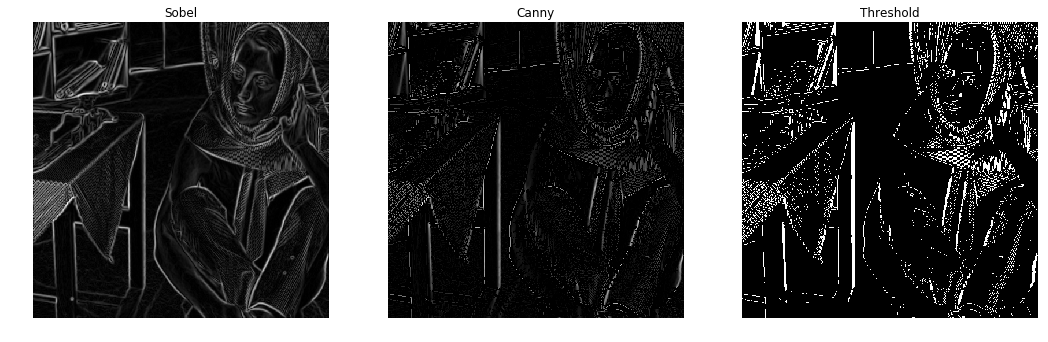

In [29]:
#Barbara

#blurring the image with a 5*5 gaussian to remove noise
gaus_kernel_canny = getGaussianKernel(5,1.0)
blurred_lena = cv2.filter2D(img_bar_gray,cv2.CV_32F,gaus_kernel_canny)

w,h = img_bar_gray.shape

#applying the sobel operator
sob1 = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
sob2 = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
sobel_lena1 = cv2.filter2D(blurred_lena, cv2.CV_32F, sob1)
sobel_lena2 = cv2.filter2D(blurred_lena, cv2.CV_32F, sob2)

#array to store the edge gradient
gradient_lena = np.zeros((w,h), dtype=np.float32)
#array to store the angle
angle_lena = np.zeros((w,h), dtype=np.float32)
#array to store the direction of the edge
edir = np.zeros((w,h),dtype=np.uint8)

#calculate the gradient and angles(in degrees)
for i in range(0,w):
    for j in range(0,h):
        gradient_lena[i][j] = int(math.sqrt(sobel_lena1[i][j]*sobel_lena1[i][j] + sobel_lena2[i][j]*sobel_lena2[i][j]))
        angle_lena[i][j] = np.degrees(np.arctan2(sobel_lena2[i][j],sobel_lena1[i][j]))

canny_lena = gradient_lena.copy()        

#Non-Maximum suppression using 4 directions: vertical, horizontal and 2 diagonals
for i in range(0,w):
    for j in range(0,h):
        if (i==0):
            val_up = 0.0
            val_up_left = 0.0
            val_up_right = 0.0
        if (j==0):
            val_left = 0.0
            val_up_left = 0.0
            val_down_left = 0.0
        if (i==(w-1)):
            val_down = 0.0
            val_down_left = 0.0
            val_down_right = 0.0
        if (j==(h-1)):
            val_right = 0.0
            val_up_right = 0.0
            val_down_right = 0.0
        
        val_cent = gradient_lena[i][j]
        
        #vertical
        if(((angle_lena[i][j]>=67.5) and (angle_lena[i][j]<=112.5)) or ((angle_lena[i][j]<=(-67.5)) and (angle_lena[i][j]>=(-112.5)))):
            edir[i][j] = 1
            if (i!=0):
                val_up = gradient_lena[i-1][j]
            if (i!=(w-1)):
                val_down = gradient_lena[i+1][j]
            if ((val_cent<=val_up) or (val_cent<=val_down)):
                canny_lena[i][j] = 0.0
        
        #horizontal
        if(((angle_lena[i][j]>=(-22.5)) and (angle_lena[i][j]<=22.5)) or ((angle_lena[i][j]>=(157.5)) and (angle_lena[i][j]<=(-157.5)))):
            edir[i][j] = 2
            if (j!=0):
                val_left = gradient_lena[i][j-1]
            if (j!=(h-1)):
                val_right = gradient_lena[i][j+1]
            if ((val_cent<=val_left) or (val_cent<=val_right)):
                canny_lena[i][j] = 0.0
        
        #Diagonal 1
        if(((angle_lena[i][j]>22.5) and (angle_lena[i][j]<67.5)) or ((angle_lena[i][j]<(-112.5)) and (angle_lena[i][j]>(-157.5)))):
            edir[i][j] = 3
            if ((i!=(w-1)) and(j!=0)):
                val_down_left = gradient_lena[i+1][j-1]
            if ((i!=(0)) and(j!=(h-1))):
                val_up_right = gradient_lena[i-1][j+1]
            if ((val_cent<=val_down_left) or (val_cent<=val_up_right)):
                canny_lena[i][j] = 0.0
        
        #Diagonal 2
        if(((angle_lena[i][j]>112.5) and (angle_lena[i][j]<157.5)) or ((angle_lena[i][j]<(-22.5)) and (angle_lena[i][j]>(-67.5)))):
            edir[i][j] = 4
            if ((i!=(0)) and(j!=(0))):
                val_up_left = gradient_lena[i-1][j-1]
            if ((i!=(w-1)) and(j!=(h-1))):
                val_down_right = gradient_lena[i+1][j+1]
            if ((val_cent<=val_up_left) or (val_cent<=val_down_right)):
                canny_lena[i][j] = 0.0
                
canny_lena_t = imThreshold(canny_lena,65,255)

plt.figure(figsize=(18,18))
plt.subplot(131)
plt.imshow(gradient_lena,cmap='gray')
plt.title('Sobel')
plt.axis("off")

plt.subplot(132)
plt.imshow(canny_lena,cmap='gray')
plt.title('Canny')
plt.axis("off")

plt.subplot(133)
plt.imshow(canny_lena_t,cmap='gray')
plt.title('Threshold')
plt.axis("off")

(-0.5, 511.5, 511.5, -0.5)

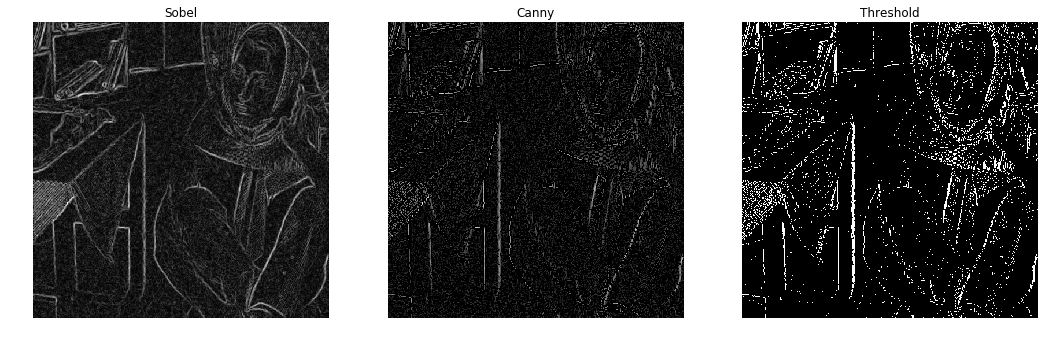

In [30]:
#Barbara noise

#blurring the image with a 5*5 gaussian to remove noise
gaus_kernel_canny = getGaussianKernel(5,1.0)
blurred_lena = cv2.filter2D(img_bar_gray_noise,cv2.CV_32F,gaus_kernel_canny)

w,h = img_bar_gray_noise.shape

#applying the sobel operator
sob1 = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
sob2 = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
sobel_lena1 = cv2.filter2D(blurred_lena, cv2.CV_32F, sob1)
sobel_lena2 = cv2.filter2D(blurred_lena, cv2.CV_32F, sob2)

#array to store the edge gradient
gradient_lena = np.zeros((w,h), dtype=np.float32)
#array to store the angle
angle_lena = np.zeros((w,h), dtype=np.float32)
#array to store the direction of the edge
edir = np.zeros((w,h),dtype=np.uint8)

#calculate the gradient and angles(in degrees)
for i in range(0,w):
    for j in range(0,h):
        gradient_lena[i][j] = int(math.sqrt(sobel_lena1[i][j]*sobel_lena1[i][j] + sobel_lena2[i][j]*sobel_lena2[i][j]))
        angle_lena[i][j] = np.degrees(np.arctan2(sobel_lena2[i][j],sobel_lena1[i][j]))

canny_lena = gradient_lena.copy()        

#Non-Maximum suppression using 4 directions: vertical, horizontal and 2 diagonals
for i in range(0,w):
    for j in range(0,h):
        if (i==0):
            val_up = 0.0
            val_up_left = 0.0
            val_up_right = 0.0
        if (j==0):
            val_left = 0.0
            val_up_left = 0.0
            val_down_left = 0.0
        if (i==(w-1)):
            val_down = 0.0
            val_down_left = 0.0
            val_down_right = 0.0
        if (j==(h-1)):
            val_right = 0.0
            val_up_right = 0.0
            val_down_right = 0.0
        
        val_cent = gradient_lena[i][j]
        
        #vertical
        if(((angle_lena[i][j]>=67.5) and (angle_lena[i][j]<=112.5)) or ((angle_lena[i][j]<=(-67.5)) and (angle_lena[i][j]>=(-112.5)))):
            edir[i][j] = 1
            if (i!=0):
                val_up = gradient_lena[i-1][j]
            if (i!=(w-1)):
                val_down = gradient_lena[i+1][j]
            if ((val_cent<=val_up) or (val_cent<=val_down)):
                canny_lena[i][j] = 0.0
        
        #horizontal
        if(((angle_lena[i][j]>=(-22.5)) and (angle_lena[i][j]<=22.5)) or ((angle_lena[i][j]>=(157.5)) and (angle_lena[i][j]<=(-157.5)))):
            edir[i][j] = 2
            if (j!=0):
                val_left = gradient_lena[i][j-1]
            if (j!=(h-1)):
                val_right = gradient_lena[i][j+1]
            if ((val_cent<=val_left) or (val_cent<=val_right)):
                canny_lena[i][j] = 0.0
        
        #Diagonal 1
        if(((angle_lena[i][j]>22.5) and (angle_lena[i][j]<67.5)) or ((angle_lena[i][j]<(-112.5)) and (angle_lena[i][j]>(-157.5)))):
            edir[i][j] = 3
            if ((i!=(w-1)) and(j!=0)):
                val_down_left = gradient_lena[i+1][j-1]
            if ((i!=(0)) and(j!=(h-1))):
                val_up_right = gradient_lena[i-1][j+1]
            if ((val_cent<=val_down_left) or (val_cent<=val_up_right)):
                canny_lena[i][j] = 0.0
        
        #Diagonal 2
        if(((angle_lena[i][j]>112.5) and (angle_lena[i][j]<157.5)) or ((angle_lena[i][j]<(-22.5)) and (angle_lena[i][j]>(-67.5)))):
            edir[i][j] = 4
            if ((i!=(0)) and(j!=(0))):
                val_up_left = gradient_lena[i-1][j-1]
            if ((i!=(w-1)) and(j!=(h-1))):
                val_down_right = gradient_lena[i+1][j+1]
            if ((val_cent<=val_up_left) or (val_cent<=val_down_right)):
                canny_lena[i][j] = 0.0
                
canny_lena_t = imThreshold(canny_lena,100,255)

plt.figure(figsize=(18,18))
plt.subplot(131)
plt.imshow(gradient_lena,cmap='gray')
plt.title('Sobel')
plt.axis("off")

plt.subplot(132)
plt.imshow(canny_lena,cmap='gray')
plt.title('Canny')
plt.axis("off")

plt.subplot(133)
plt.imshow(canny_lena_t,cmap='gray')
plt.title('Threshold')
plt.axis("off")

- **Problem 7 {15 pts extra credit}:** Implement in Python the third step of the Canny algorithm HYSTERESIS_THRESH. Select two appropriate thresholds for the road and road_noise image, assuming that you would want to use the results in a self driving car application. Include your code and results in your Jupyter Notebook file.

(-0.5, 1023.5, 767.5, -0.5)

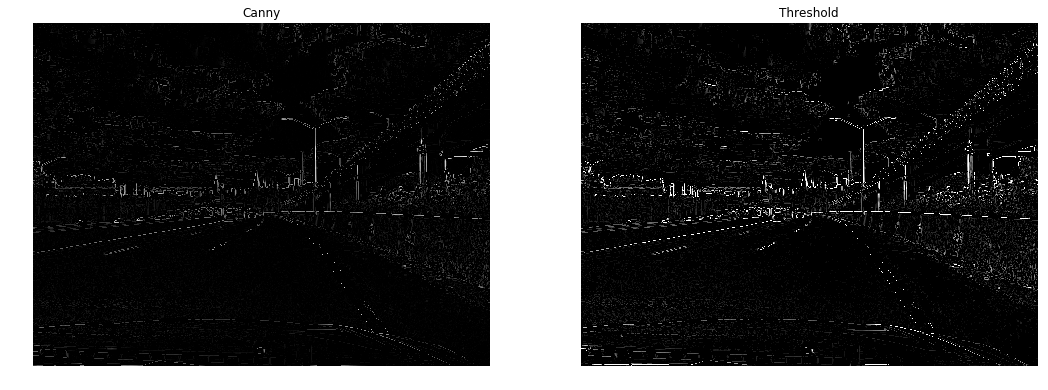

In [31]:
# write your code for Problem 7 here

#same code as that of the previous section
#blurring the image with a 5*5 gaussian to remove noise
gaus_kernel_canny = getGaussianKernel(5,1)
blurred_lena = cv2.filter2D(img_road_gray,cv2.CV_32F,gaus_kernel_canny)

w,h = img_road_gray.shape

#applying the sobel operator
sob1 = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
sob2 = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
sobel_lena1 = cv2.filter2D(blurred_lena, cv2.CV_32F, sob1)
sobel_lena2 = cv2.filter2D(blurred_lena, cv2.CV_32F, sob2)

#array to store the edge gradient
gradient_lena = np.zeros((w,h), dtype=np.float32)
#array to store the angle
angle_lena = np.zeros((w,h), dtype=np.float32)
#array to store the direction of the edge
edir = np.zeros((w,h),dtype=np.uint8)

#calculate the gradient and angles(in degrees)
for i in range(0,w):
    for j in range(0,h):
        gradient_lena[i][j] = int(math.sqrt(sobel_lena1[i][j]*sobel_lena1[i][j] + sobel_lena2[i][j]*sobel_lena2[i][j]))
        angle_lena[i][j] = np.degrees(np.arctan2(sobel_lena2[i][j],sobel_lena1[i][j]))

canny_lena = gradient_lena.copy()        

#Non-Maximum suppression using 4 directions: vertical, horizontal and 2 diagonals
for i in range(0,w):
    for j in range(0,h):
        if (i==0):
            val_up = 0.0
            val_up_left = 0.0
            val_up_right = 0.0
        if (j==0):
            val_left = 0.0
            val_up_left = 0.0
            val_down_left = 0.0
        if (i==(w-1)):
            val_down = 0.0
            val_down_left = 0.0
            val_down_right = 0.0
        if (j==(h-1)):
            val_right = 0.0
            val_up_right = 0.0
            val_down_right = 0.0
        
        val_cent = gradient_lena[i][j]
        
        #vertical
        if(((angle_lena[i][j]>=67.5) and (angle_lena[i][j]<=112.5)) or ((angle_lena[i][j]<=(-67.5)) and (angle_lena[i][j]>=(-112.5)))):
            edir[i][j] = 1
            if (i!=0):
                val_up = gradient_lena[i-1][j]
            if (i!=(w-1)):
                val_down = gradient_lena[i+1][j]
            if ((val_cent<=val_up) or (val_cent<=val_down)):
                canny_lena[i][j] = 0.0
        
        #horizontal
        if(((angle_lena[i][j]>=(-22.5)) and (angle_lena[i][j]<=22.5)) or ((angle_lena[i][j]>=(157.5)) and (angle_lena[i][j]<=(-157.5)))):
            edir[i][j] = 2
            if (j!=0):
                val_left = gradient_lena[i][j-1]
            if (j!=(h-1)):
                val_right = gradient_lena[i][j+1]
            if ((val_cent<=val_left) or (val_cent<=val_right)):
                canny_lena[i][j] = 0.0
        
        #Diagonal 1
        if(((angle_lena[i][j]>22.5) and (angle_lena[i][j]<67.5)) or ((angle_lena[i][j]<(-112.5)) and (angle_lena[i][j]>(-157.5)))):
            edir[i][j] = 3
            if ((i!=(w-1)) and(j!=0)):
                val_down_left = gradient_lena[i+1][j-1]
            if ((i!=(0)) and(j!=(h-1))):
                val_up_right = gradient_lena[i-1][j+1]
            if ((val_cent<=val_down_left) or (val_cent<=val_up_right)):
                canny_lena[i][j] = 0.0
        
        #Diagonal 2
        if(((angle_lena[i][j]>112.5) and (angle_lena[i][j]<157.5)) or ((angle_lena[i][j]<(-22.5)) and (angle_lena[i][j]>(-67.5)))):
            edir[i][j] = 4
            if ((i!=(0)) and(j!=(0))):
                val_up_left = gradient_lena[i-1][j-1]
            if ((i!=(w-1)) and(j!=(h-1))):
                val_down_right = gradient_lena[i+1][j+1]
            if ((val_cent<=val_up_left) or (val_cent<=val_down_right)):
                canny_lena[i][j] = 0.0

#padding
canny_road_temp = canny_lena.copy()
canny_road1 = np.pad(canny_road_temp,(1,1),'minimum')
canny_road_final = canny_road1.copy()
dir = np.pad(edir,(1,1),'minimum')

min_t = 10
max_t = 200

#basic thresholding once with thresholds defined above
for q in range(1,2):
    for i in range(1,w+1):
        for j in range(1,h+1):
            if (canny_road1[i][j]<min_t):
                canny_road_final[i][j] = 0
            if (canny_road1[i][j]>max_t):
                canny_road_final[i][j] = 255
            if ((canny_road1[i][j]>min_t) and (canny_road1[i][j]<max_t)):
                va1 = canny_road1[i-1][j-1]
                va2 = canny_road1[i-1][j]
                va3 = canny_road1[i-1][j+1]
                va4 = canny_road1[i][j-1]
                va5 = canny_road1[i][j+1]
                va6 = canny_road1[i+1][j-1]
                va7 = canny_road1[i+1][j]
                va8 = canny_road1[i+1][j+1]
                #horizontal edge
                if(dir[i][j]==1):
                    if(va4>max_t or va5>max_t):
                        canny_road_final[i][j] = 255
                #vertical edge
                if(dir[i][j]==2):
                    if(va2>max_t or va7>max_t):
                        canny_road_final[i][j] = 255
                #diagonal edge 1
                if(dir[i][j]==3):
                    if(va1>max_t or va8>max_t):
                        canny_road_final[i][j] = 255
                #horizontal edge
                if(dir[i][j]==4):
                    if(va3>max_t or va6>max_t):
                        canny_road_final[i][j] = 255
    
    canny_road1 = canny_road_final.copy()

plt.figure(figsize=(18,18))
plt.subplot(1, 2, 2)
plt.imshow(canny_road_final,cmap='gray')
plt.title('Threshold')
plt.axis("off")

plt.subplot(1, 2, 1)
plt.imshow(canny_road_temp,cmap='gray')
plt.title('Canny')
plt.axis("off")

(-0.5, 1023.5, 767.5, -0.5)

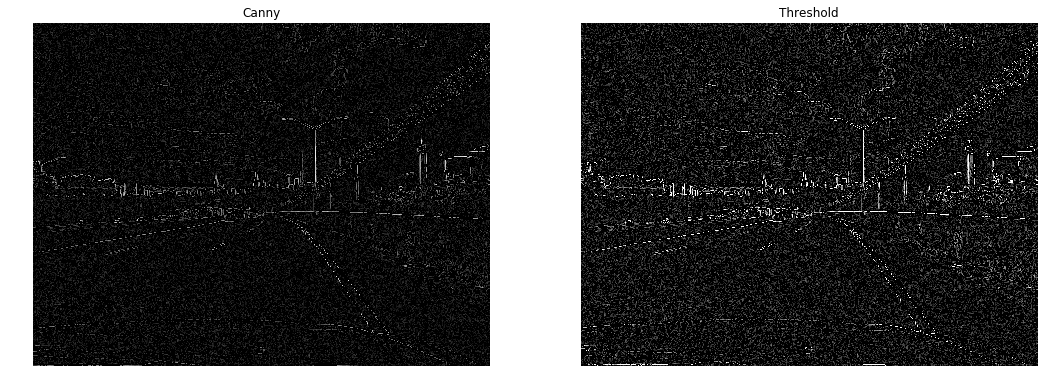

In [32]:
#same code as that of the previous section
#blurring the image with a 5*5 gaussian to remove noise
gaus_kernel_canny = getGaussianKernel(5,1)
blurred_lena = cv2.filter2D(img_road_gray_noise,cv2.CV_32F,gaus_kernel_canny)

w,h = img_road_gray_noise.shape

#applying the sobel operator
sob1 = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
sob2 = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
sobel_lena1 = cv2.filter2D(blurred_lena, cv2.CV_32F, sob1)
sobel_lena2 = cv2.filter2D(blurred_lena, cv2.CV_32F, sob2)

#array to store the edge gradient
gradient_lena = np.zeros((w,h), dtype=np.float32)
#array to store the angle
angle_lena = np.zeros((w,h), dtype=np.float32)
#array to store the direction of the edge
edir = np.zeros((w,h),dtype=np.uint8)

#calculate the gradient and angles(in degrees)
for i in range(0,w):
    for j in range(0,h):
        gradient_lena[i][j] = int(math.sqrt(sobel_lena1[i][j]*sobel_lena1[i][j] + sobel_lena2[i][j]*sobel_lena2[i][j]))
        angle_lena[i][j] = np.degrees(np.arctan2(sobel_lena2[i][j],sobel_lena1[i][j]))

canny_lena = gradient_lena.copy()        

#Non-Maximum suppression using 4 directions: vertical, horizontal and 2 diagonals
for i in range(0,w):
    for j in range(0,h):
        if (i==0):
            val_up = 0.0
            val_up_left = 0.0
            val_up_right = 0.0
        if (j==0):
            val_left = 0.0
            val_up_left = 0.0
            val_down_left = 0.0
        if (i==(w-1)):
            val_down = 0.0
            val_down_left = 0.0
            val_down_right = 0.0
        if (j==(h-1)):
            val_right = 0.0
            val_up_right = 0.0
            val_down_right = 0.0
        
        val_cent = gradient_lena[i][j]
        
        #vertical
        if(((angle_lena[i][j]>=67.5) and (angle_lena[i][j]<=112.5)) or ((angle_lena[i][j]<=(-67.5)) and (angle_lena[i][j]>=(-112.5)))):
            edir[i][j] = 1
            if (i!=0):
                val_up = gradient_lena[i-1][j]
            if (i!=(w-1)):
                val_down = gradient_lena[i+1][j]
            if ((val_cent<=val_up) or (val_cent<=val_down)):
                canny_lena[i][j] = 0.0
        
        #horizontal
        if(((angle_lena[i][j]>=(-22.5)) and (angle_lena[i][j]<=22.5)) or ((angle_lena[i][j]>=(157.5)) and (angle_lena[i][j]<=(-157.5)))):
            edir[i][j] = 2
            if (j!=0):
                val_left = gradient_lena[i][j-1]
            if (j!=(h-1)):
                val_right = gradient_lena[i][j+1]
            if ((val_cent<=val_left) or (val_cent<=val_right)):
                canny_lena[i][j] = 0.0
        
        #Diagonal 1
        if(((angle_lena[i][j]>22.5) and (angle_lena[i][j]<67.5)) or ((angle_lena[i][j]<(-112.5)) and (angle_lena[i][j]>(-157.5)))):
            edir[i][j] = 3
            if ((i!=(w-1)) and(j!=0)):
                val_down_left = gradient_lena[i+1][j-1]
            if ((i!=(0)) and(j!=(h-1))):
                val_up_right = gradient_lena[i-1][j+1]
            if ((val_cent<=val_down_left) or (val_cent<=val_up_right)):
                canny_lena[i][j] = 0.0
        
        #Diagonal 2
        if(((angle_lena[i][j]>112.5) and (angle_lena[i][j]<157.5)) or ((angle_lena[i][j]<(-22.5)) and (angle_lena[i][j]>(-67.5)))):
            edir[i][j] = 4
            if ((i!=(0)) and(j!=(0))):
                val_up_left = gradient_lena[i-1][j-1]
            if ((i!=(w-1)) and(j!=(h-1))):
                val_down_right = gradient_lena[i+1][j+1]
            if ((val_cent<=val_up_left) or (val_cent<=val_down_right)):
                canny_lena[i][j] = 0.0

#padding
canny_road_temp = canny_lena.copy()
canny_road1 = np.pad(canny_road_temp,(1,1),'minimum')
canny_road_final = canny_road1.copy()
dir = np.pad(edir,(1,1),'minimum')

min_t = 20
max_t = 220

#basic thresholding once with thresholds defined above
for q in range(1,2):
    for i in range(1,w+1):
        for j in range(1,h+1):
            if (canny_road1[i][j]<min_t):
                canny_road_final[i][j] = 0
            if (canny_road1[i][j]>max_t):
                canny_road_final[i][j] = 255
            if ((canny_road1[i][j]>min_t) and (canny_road1[i][j]<max_t)):
                va1 = canny_road1[i-1][j-1]
                va2 = canny_road1[i-1][j]
                va3 = canny_road1[i-1][j+1]
                va4 = canny_road1[i][j-1]
                va5 = canny_road1[i][j+1]
                va6 = canny_road1[i+1][j-1]
                va7 = canny_road1[i+1][j]
                va8 = canny_road1[i+1][j+1]
                #horizontal edge
                if(dir[i][j]==1):
                    if(va4>max_t or va5>max_t):
                        canny_road_final[i][j] = 255
                #vertical edge
                if(dir[i][j]==2):
                    if(va2>max_t or va7>max_t):
                        canny_road_final[i][j] = 255
                #diagonal edge 1
                if(dir[i][j]==3):
                    if(va1>max_t or va8>max_t):
                        canny_road_final[i][j] = 255
                #horizontal edge
                if(dir[i][j]==4):
                    if(va3>max_t or va6>max_t):
                        canny_road_final[i][j] = 255
    
    canny_road1 = canny_road_final.copy()

plt.figure(figsize=(18,18))
plt.subplot(1, 2, 2)
plt.imshow(canny_road_final,cmap='gray')
plt.title('Threshold')
plt.axis("off")

plt.subplot(1, 2, 1)
plt.imshow(canny_road_temp,cmap='gray')
plt.title('Canny')
plt.axis("off")

## Submission
---
Submission will be via Blackboard. The only file you need to submit is this .ipynb notebook file with your answers. **NO** need to submit the resulting images separately.